In [118]:
import pandas as pd
import sqlite3

In [119]:
connect = sqlite3.connect('../../datasets/checking-logs.sqlite')

In [120]:
query =""" 
SELECT timestamp as date
FROM checker WHERE uid LIKE 'user_%'
"""

In [121]:
daytime = pd.read_sql(query,connect,parse_dates=['date'])
daytime

,date
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [122]:
bins = [0, 4, 10, 17, 24]
labels = ['night', 'morning', 'afternoon', 'evening']
daytime['time_period'] = pd.cut(daytime['date'].dt.hour, bins=bins, labels=labels, right=False)
daytime['date'] = daytime['date'].dt.date


In [123]:
daily_commits = daytime.groupby(['date', 'time_period'],observed=False).size().unstack(fill_value=0)
daily_commits = daily_commits.sort_index()

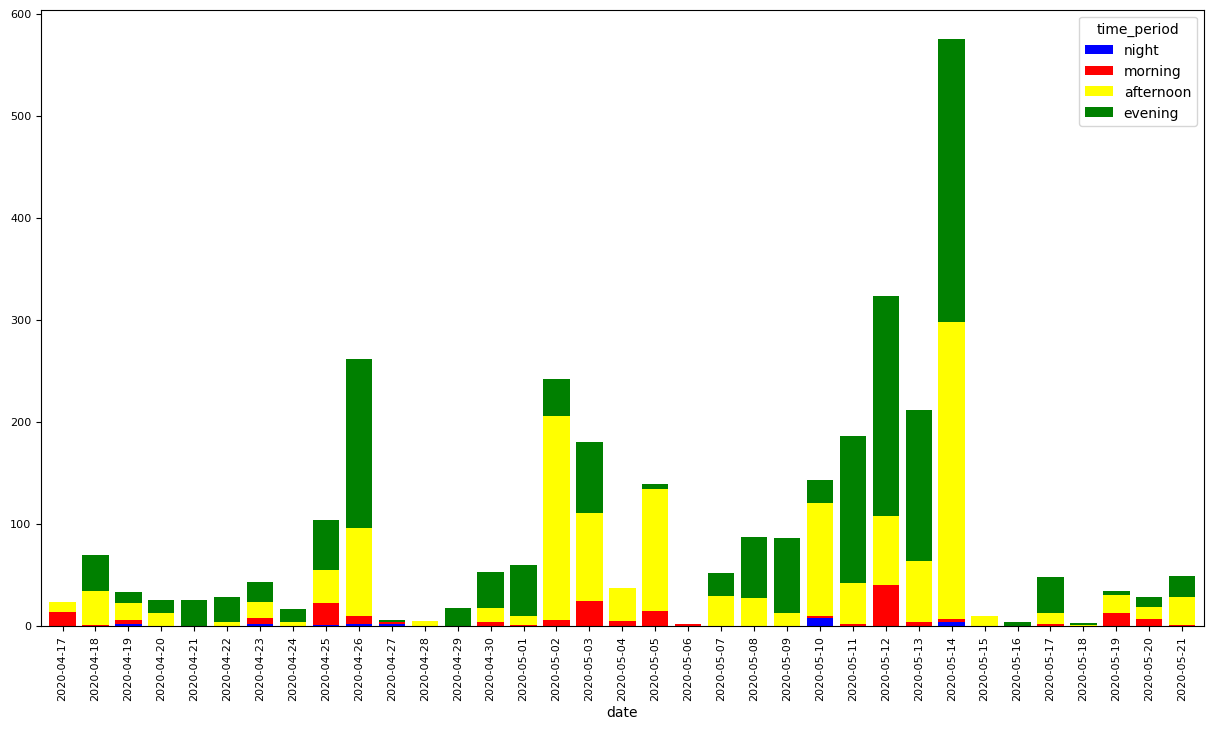

In [124]:
ax = daily_commits.plot(
    kind='bar',
    stacked=True,
    figsize=(15, 8),
    rot = 90,
    color=['blue', 'red','yellow','green'],
    width=0.8,
    fontsize=8
)

In [125]:
top_periods = daytime['time_period'].value_counts().nlargest(2).index.tolist()
condition = (daily_commits['evening'] > daily_commits['afternoon'])
busiest_day = daily_commits[condition].sum(axis=1).idxmax()

In [126]:
connect.close()

Мы выводим два самых частых времени суток,когда пользователи оставляют коммиты,показываем самый распространенный день и какое время суток самое популярное

In [127]:
print(top_periods[0],top_periods[1])
print(busiest_day)
print(daily_commits.loc[busiest_day,'evening'])
print(daily_commits.loc[busiest_day,'afternoon'])

evening afternoon
2020-05-12
215
68
